In [1]:
!pip install kaggle

In [4]:
! mkdir -p ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c cifar-10

100% 713M/715M [00:07<00:00, 101MB/s]
100% 715M/715M [00:07<00:00, 97.9MB/s]


In [10]:
from zipfile import ZipFile
dataset = 'cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Data is extracted')

Data is extracted


In [11]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 13.4 MB/s eta 0:00:00


In [12]:
import py7zr


archive = py7zr.SevenZipFile('train.7z', mode='r')
archive.extractall()
archive.close()

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split

In [13]:
filenames = os.listdir('train')
type(filenames)
len(filenames)

50000

In [14]:
labels_df = pd.read_csv('trainLabels.csv')

In [15]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [16]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [17]:
labels_dict = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9 }

labels = [labels_dict[i] for i in labels_df['label']]


In [18]:
print(labels[0:5])

[6, 9, 9, 4, 1]


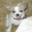

In [19]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('train/7780.png')
cv2_imshow(img)

In [20]:
id_list = list(labels_df['id'])

In [21]:

train_data_folder = 'train/'

data = []
for id in id_list:
  img = Image.open(train_data_folder + str(id) + '.png')
  img = np.array(img)
  data.append(img)


In [22]:
x = np.array(data)
y = np.array(labels)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 18)

In [24]:
#scaling the data

train_scaled = x_train/255
test_scaled = x_test/255


In [25]:
import tensorflow as tf
from tensorflow import keras

In [38]:
num_of_classes = 10

model= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [40]:
model.fit(train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.9460 - acc: 0.2889 - val_loss: 1.8903 - val_acc: 0.3230
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8053 - acc: 0.3476 - val_loss: 1.8885 - val_acc: 0.3270
Epoch 3/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7723 - acc: 0.3646 - val_loss: 1.7701 - val_acc: 0.3587
Epoch 4/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7494 - acc: 0.3709 - val_loss: 1.7536 - val_acc: 0.3643
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7366 - acc: 0.3740 - val_loss: 1.7350 - val_acc: 0.3677
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7270 - acc: 0.3796 - val_loss: 1.7852 - val_acc: 0.3593
Epoch 7/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7145 - acc: 0.3857 - val_loss: 1.7848 - val_acc: 0.3532
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

In [29]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [30]:
cnn_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
cnn_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [31]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='relu'))

In [34]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])


In [35]:
history = model.fit(train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 490s 404ms/step - loss: 6.4927 - acc: 0.2141 - val_loss: 3.7953 - val_acc: 0.4283
Epoch 2/10
1125/1125 [==============================] - 450s 400ms/step - loss: 4.7159 - acc: 0.3201 - val_loss: 2.6413 - val_acc: 0.5985
Epoch 3/10
1125/1125 [==============================] - 456s 405ms/step - loss: 3.7996 - acc: 0.3880 - val_loss: 2.3478 - val_acc: 0.6460
Epoch 4/10
1125/1125 [==============================] - 456s 405ms/step - loss: 3.2078 - acc: 0.4415 - val_loss: 2.0627 - val_acc: 0.6833
Epoch 5/10
1125/1125 [==============================] - 450s 400ms/step - loss: 2.8546 - acc: 0.4874 - val_loss: 1.7868 - val_acc: 0.7092
Epoch 6/10
1125/1125 [==============================] - 456s 405ms/step - loss: 2.5046 - acc: 0.5224 - val_loss: 1.5902 - val_acc: 0.7240
Epoch 7/10
1125/1125 [==============================] - 455s 405ms/step - loss: 2.2706 - acc: 0.5646 - val_loss: 1.4700 - val_acc: 0.7538
Epoch 8/10
1125/1125 [============

In [36]:
loss, accuracy = model.evaluate(test_scaled, y_test)
print('Test Accuracy: ', accuracy)

313/313 [==============================] - 40s 122ms/step - loss: 0.9556 - acc: 0.8483
Test Accuracy:  0.8482999801635742


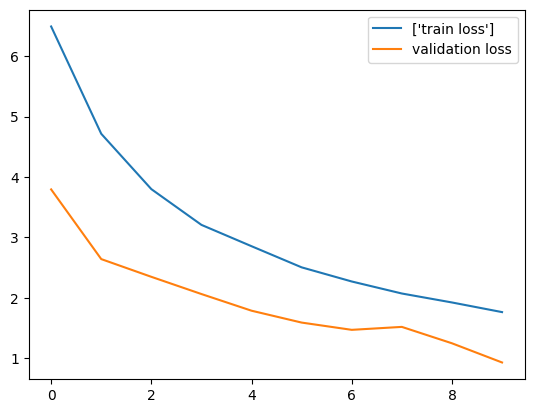

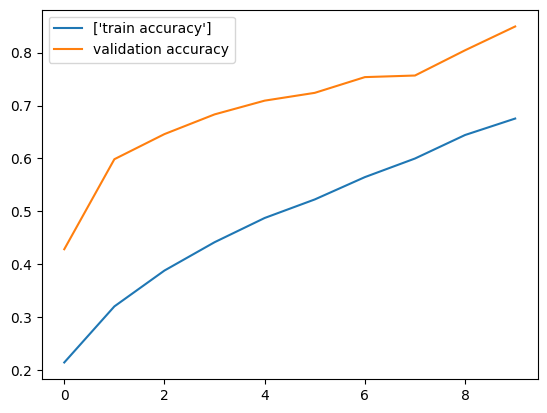

In [37]:
h = history

plt.plot(h.history['loss'], label=['train loss'])
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label=['train accuracy'])
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()
